In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [8]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['weatherAUS.csv']))
# Dataset is now stored in a Pandas Dataframe

In [9]:
df = df2.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
df.shape

(145460, 23)

In [13]:
import missingno as msno

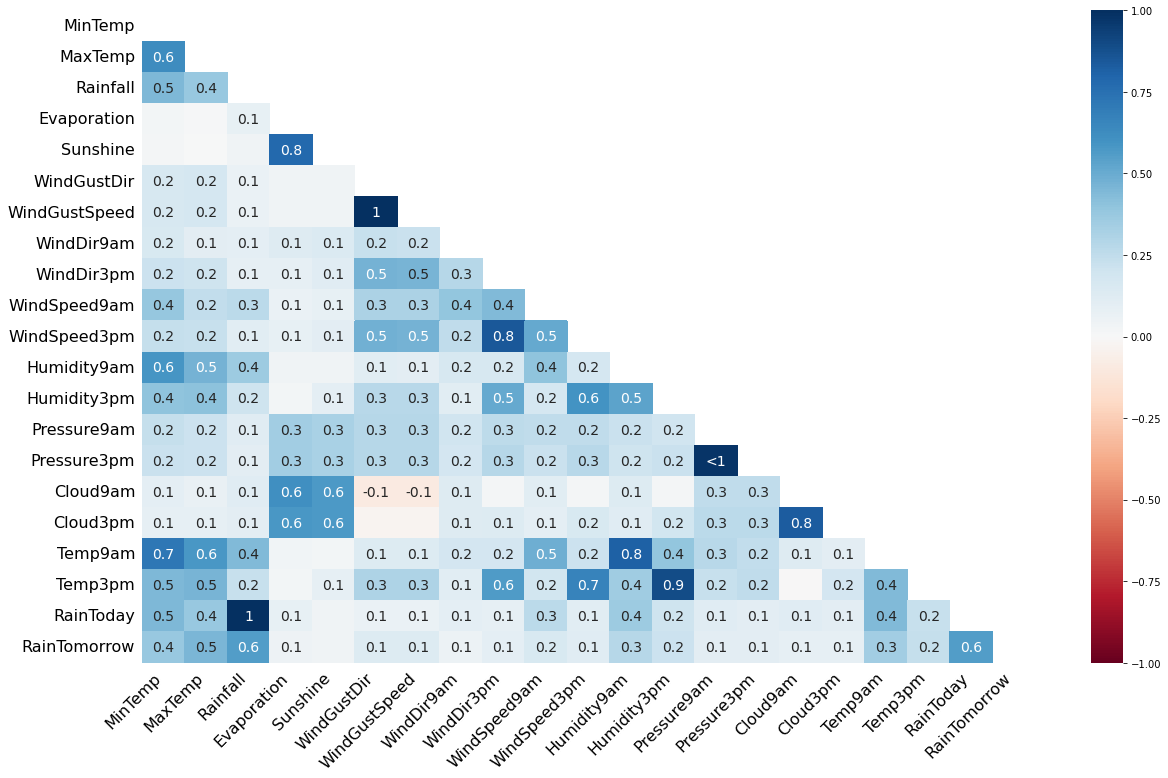

In [14]:
msno.heatmap(df)

In [15]:
print("data shape:",df.shape)
print("\n","No of nulls in column:","\n",df.isnull().sum())

data shape: (145460, 23)

 No of nulls in column: 
 Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [18]:
df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"], axis=1, inplace= True)

In [19]:
import seaborn as sns

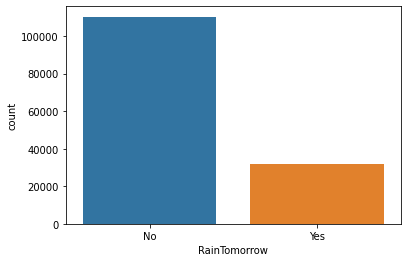

In [20]:
sns.countplot(x=df.RainTomorrow, data=df)

In [21]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [22]:
for i in df.columns:
  if df[i].dtype==object:
    df[i][df[i].isnull()]=df[i].mode()
  else:
    df[i][df[i].isnull()]=df[i].median()
df.dropna(axis=0,inplace=True)

<ipython-input-22-087dd0c189ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i].isnull()]=df[i].mode()
<ipython-input-22-087dd0c189ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i].isnull()]=df[i].median()
<ipython-input-22-087dd0c189ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i].isnull()]=df[i].median()
<ipython-input-22-087dd0c189ea>:5: SettingWithCopyWarning: 
A value is trying to be set

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           123710 non-null  object 
 1   Location       123710 non-null  object 
 2   MinTemp        123710 non-null  float64
 3   MaxTemp        123710 non-null  float64
 4   Rainfall       123710 non-null  float64
 5   WindGustDir    123710 non-null  object 
 6   WindGustSpeed  123710 non-null  float64
 7   WindDir9am     123710 non-null  object 
 8   WindDir3pm     123710 non-null  object 
 9   WindSpeed9am   123710 non-null  float64
 10  WindSpeed3pm   123710 non-null  float64
 11  Humidity9am    123710 non-null  float64
 12  Humidity3pm    123710 non-null  float64
 13  Pressure9am    123710 non-null  float64
 14  Pressure3pm    123710 non-null  float64
 15  Temp9am        123710 non-null  float64
 16  Temp3pm        123710 non-null  float64
 17  RainToday      123710 non-nul

In [24]:
print("is there any null value:",df.isnull().sum().any())

is there any null value: False


In [25]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder= LabelEncoder()
for i in df.columns:
  if df[i].dtype == object:
    df[i] = encoder.fit_transform(df[i])

In [30]:
X=df.drop("RainTomorrow",axis=1)
y=df.RainTomorrow.values.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [31]:
from sklearn.preprocessing import RobustScaler

In [32]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,stratify=y,random_state=123)

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader

In [38]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [39]:
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)

In [40]:
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,shuffle=True)

In [42]:
X.shape

(123710, 18)

In [43]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()

    self.fcl = nn.Linear(18,250)
    self.out = nn.Linear(250,1)
  def forward(self,X):
    X = F.relu(self.fcl(X))
    X = self.out(X)
    return X

In [ ]:
#class Model(nn.Model) :
#  def __init__(self) :
#    super(Model,self).__init__()#

#    self.fc1 = nn.Linear(18,2500)
#    self.fc2 = nn.Linear(2500,1250)
#    self.out = nn.Linear(1250,1)
#  def forward(self,X):
#    X= F.relu(selft,fc1(X))
#    X= F.relu(self.fc2(X))
#    X = self.out(X)

In [44]:
model = Model()

In [47]:
def get_n_params(model):
  pp=0
  for p in list(model.parameters()):
    nn=1
    for s in list(p.size()):
      nn= nn*s
    pp += nn
  return pp

In [48]:
get_n_params(model)

5001

In [49]:
#Defining parametres
num_epochs = 15
lr_rate = 0.05
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(),lr=lr_rate)

In [50]:
#creating supporting function
def binary_acc(y_pred,y_test):
  y_pred_tag = torch.round(torch.sigmoid(y_pred))

  correct_results_sum = (y_pred_tag == y_test).sum().float()
  acc = correct_results_sum/y_test.shape[0]
  acc = torch.round(acc*100)
  return acc

In [54]:
model.train()
for e in range(1,num_epochs+1):
  epoch_loss = 0
  epoch_acc = 0
  for X_batch,y_batch in train_loader:
    optimizer.zero_grad()
    y_pred = model(X_batch)

    loss = criterion(y_pred,y_batch.float())
    acc = binary_acc(y_pred,y_batch.float())

    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
    epoch_acc += acc.item()

  print(f'Epoch:{e+0:03}:  | Loss:{epoch_loss/len(train_loader):.5f} |Acc:{epoch_acc/len(train_loader):.3f}')

Epoch:001:  | Loss:0.33977 |Acc:85.503
Epoch:002:  | Loss:0.33921 |Acc:85.452
Epoch:003:  | Loss:0.33965 |Acc:85.423
Epoch:004:  | Loss:0.33947 |Acc:85.431
Epoch:005:  | Loss:0.33857 |Acc:85.529
Epoch:006:  | Loss:0.33798 |Acc:85.485
Epoch:007:  | Loss:0.33740 |Acc:85.550
Epoch:008:  | Loss:0.33694 |Acc:85.583
Epoch:009:  | Loss:0.33733 |Acc:85.549
Epoch:010:  | Loss:0.33624 |Acc:85.636
Epoch:011:  | Loss:0.33617 |Acc:85.639
Epoch:012:  | Loss:0.33604 |Acc:85.610
Epoch:013:  | Loss:0.33534 |Acc:85.670
Epoch:014:  | Loss:0.33532 |Acc:85.633
Epoch:015:  | Loss:0.33439 |Acc:85.701


In [62]:
y_pred_list = []
model.eval()
with torch.no_grad():
  for X_batch, y_batch in test_loader:
    torch.no_grad()
    y_test_pred = model(X_batch)
    y_test_pred = torch.sigmoid(y_test_pred)
    y_pred_tag = torch.round(y_test_pred)
    y_pred_list.append(y_pred_tag.numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [63]:
from sklearn.metrics  import confusion_matrix
from sklearn.metrics import classification_report

In [64]:
print(confusion_matrix(y_test,y_pred_list))

[[16483  2781]
 [ 4663   815]]


In [65]:
print(classification_report(y_test,y_pred_list))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82     19264
         1.0       0.23      0.15      0.18      5478

    accuracy                           0.70     24742
   macro avg       0.50      0.50      0.50     24742
weighted avg       0.66      0.70      0.67     24742

